In [71]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.ensemble           import ExtraTreesClassifier
from sklearn.model_selection    import  train_test_split ,cross_val_predict, StratifiedKFold, cross_validate
from sklearn.metrics            import  accuracy_score, balanced_accuracy_score, plot_confusion_matrix, make_scorer
from catboost                   import CatBoostClassifier
from sklearn.model_selection    import GridSearchCV

In [72]:
df= pd.read_csv('.\data\heart.csv')

df.isnull().sum()


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Dropping 'output' because is our target

In [73]:
x=df.drop('output', axis=1)
y= df.output


<AxesSubplot:xlabel='output', ylabel='count'>

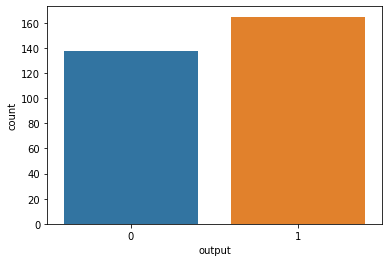

In [74]:
sb.countplot(x ='output', data = df)

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

In [57]:
cat= CatBoostClassifier(learning_rate=0.001,allow_writing_files=False,n_estimators=100,random_state=0)
extree= ExtraTreesClassifier(random_state=0)

Catboost model

In [58]:
cat_model=cat.fit(x_train,y_train)
score=cat_model.score(x_test,y_test)

prediction=cat.predict(x_test)

0:	learn: 0.6928398	total: 7.91ms	remaining: 783ms
1:	learn: 0.6925321	total: 18.5ms	remaining: 908ms
2:	learn: 0.6922581	total: 23.1ms	remaining: 748ms
3:	learn: 0.6920156	total: 29.5ms	remaining: 709ms
4:	learn: 0.6917257	total: 43.5ms	remaining: 827ms
5:	learn: 0.6914419	total: 58.6ms	remaining: 918ms
6:	learn: 0.6911189	total: 62.3ms	remaining: 828ms
7:	learn: 0.6908342	total: 76ms	remaining: 874ms
8:	learn: 0.6905472	total: 109ms	remaining: 1.1s
9:	learn: 0.6903062	total: 129ms	remaining: 1.16s
10:	learn: 0.6900717	total: 139ms	remaining: 1.13s
11:	learn: 0.6898060	total: 185ms	remaining: 1.36s
12:	learn: 0.6895605	total: 192ms	remaining: 1.28s
13:	learn: 0.6892025	total: 196ms	remaining: 1.2s
14:	learn: 0.6888711	total: 201ms	remaining: 1.14s
15:	learn: 0.6886074	total: 206ms	remaining: 1.08s
16:	learn: 0.6883047	total: 213ms	remaining: 1.04s
17:	learn: 0.6880592	total: 216ms	remaining: 985ms
18:	learn: 0.6877820	total: 222ms	remaining: 945ms
19:	learn: 0.6874263	total: 227ms	rem

In [59]:
score

0.8688524590163934

C:\Users\KINGSLEY\Anaconda3\Anaconda\envs\kingsley\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


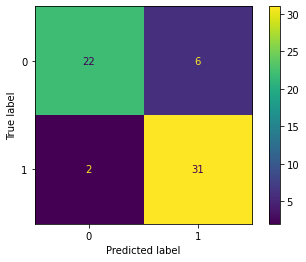

In [60]:
# plotting comfussion matrix to verify 
plot_confusion_matrix(cat, x_test, y_test)
plt.show()

In [61]:
# cross validating
cv=cross_validate(cat, x_train, y_train, return_estimator=True, cv=5)

        #print out cross validation scores
[print('Crossvalidation fold: {}  Accruacy: {}'.format(n, score)) for n, score in enumerate(cv['test_score'])]
        #print out the mean of the cross validation
print('Mean train cross validation score {}'.format(cv['test_score'].mean()))

0:	learn: 0.6928567	total: 40.4ms	remaining: 4s
1:	learn: 0.6926035	total: 52.5ms	remaining: 2.57s
2:	learn: 0.6923090	total: 60.9ms	remaining: 1.97s
3:	learn: 0.6920414	total: 73.4ms	remaining: 1.76s
4:	learn: 0.6917835	total: 88.3ms	remaining: 1.68s
5:	learn: 0.6915545	total: 109ms	remaining: 1.71s
6:	learn: 0.6912487	total: 120ms	remaining: 1.6s
7:	learn: 0.6910293	total: 141ms	remaining: 1.62s
8:	learn: 0.6907390	total: 147ms	remaining: 1.49s
9:	learn: 0.6905374	total: 155ms	remaining: 1.39s
10:	learn: 0.6903269	total: 168ms	remaining: 1.36s
11:	learn: 0.6900412	total: 185ms	remaining: 1.35s
12:	learn: 0.6898221	total: 208ms	remaining: 1.39s
13:	learn: 0.6894906	total: 212ms	remaining: 1.3s
14:	learn: 0.6892143	total: 231ms	remaining: 1.31s
15:	learn: 0.6889781	total: 242ms	remaining: 1.27s
16:	learn: 0.6886739	total: 247ms	remaining: 1.21s
17:	learn: 0.6884224	total: 264ms	remaining: 1.2s
18:	learn: 0.6882435	total: 276ms	remaining: 1.18s
19:	learn: 0.6880307	total: 283ms	remainin

In [62]:
# GridSearch

params = {#'iterations': [500],
          'depth': [4, 5, 6],
          'loss_function': ['Logloss', 'CrossEntropy'],
          'l2_leaf_reg': np.logspace(-20, -19, 3),
          'leaf_estimation_iterations': [10],
#           'eval_metric': ['Accuracy'],
#           'use_best_model': ['True'],
          'logging_level':['Silent'],
          #'random_seed': [0]
         }
scorer = make_scorer(accuracy_score)
cat_grid= GridSearchCV(estimator=cat, param_grid=params, scoring=scorer, cv=5)


In [63]:
cat_grid.fit(x_train, y_train)
best_param = cat_grid.best_params_
best_param

{'depth': 5,
 'l2_leaf_reg': 1e-20,
 'leaf_estimation_iterations': 10,
 'logging_level': 'Silent',
 'loss_function': 'Logloss'}

fitting the best model

In [64]:
model_cat = CatBoostClassifier(iterations=1000,
                           loss_function=best_param['loss_function'],
                           depth=best_param['depth'],
                           l2_leaf_reg=best_param['l2_leaf_reg'],
                           eval_metric='Accuracy',
                           leaf_estimation_iterations=10,
                           #use_best_model=True,
                           logging_level='Silent',
                           random_seed=0, 
                        allow_writing_files=False
                          )

In [65]:
model_cat.fit(x_train, y_train)


In [66]:
pred=model_cat.predict(x_test)

In [67]:
model_cat.score(x_test, y_test)

0.8360655737704918

C:\Users\KINGSLEY\Anaconda3\Anaconda\envs\kingsley\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


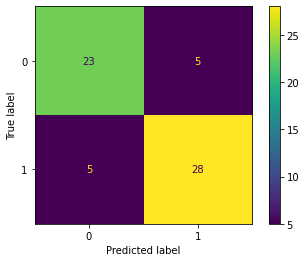

In [68]:
plot_confusion_matrix(model_cat, x_test, y_test)

In [48]:
cv=cross_validate(model_cat, x_train, y_train, return_estimator=True, cv=5)

        #print out cross validation scores
[print('Crossvalidation fold: {}  Accruacy: {}'.format(n, score)) for n, score in enumerate(cv['test_score'])]
        #print out the mean of the cross validation
print('Mean train cross validation score {}'.format(cv['test_score'].mean()))

Crossvalidation fold: 0  Accruacy: 0.7543859649122807
Crossvalidation fold: 1  Accruacy: 0.8070175438596491
Crossvalidation fold: 2  Accruacy: 0.8070175438596491
Crossvalidation fold: 3  Accruacy: 0.8392857142857143
Crossvalidation fold: 4  Accruacy: 0.6964285714285714
Mean train cross validation score 0.7808270676691729


In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [70]:
print(classification_report(y_test,prediction ))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.84      0.94      0.89        33

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



# ExtraTreesClassifier

In [92]:
ex=ExtraTreesClassifier(n_estimators=100)
ex.fit(x_train, y_train)
pred_ex=ex.predict(x_test)
score=ex.score(x_test, y_test)

In [93]:
score

0.8688524590163934

C:\Users\KINGSLEY\Anaconda3\Anaconda\envs\kingsley\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


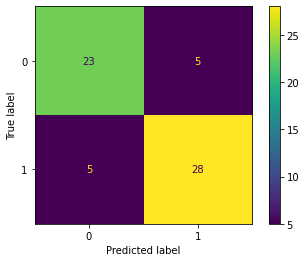

In [94]:
plot_confusion_matrix(model_cat, x_test, y_test)
plt.show()

In [95]:
print(classification_report(y_test,pred_ex ))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        28
           1       0.88      0.88      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [96]:
cv=cross_validate(ex, x_train, y_train, return_estimator=True, cv=5)

        #print out cross validation scores
[print('Crossvalidation fold: {}  Accruacy: {}'.format(n, score)) for n, score in enumerate(cv['test_score'])]
        #print out the mean of the cross validation
print('Mean train cross validation score {}'.format(cv['test_score'].mean()))

Crossvalidation fold: 0  Accruacy: 0.8571428571428571
Crossvalidation fold: 1  Accruacy: 0.8775510204081632
Crossvalidation fold: 2  Accruacy: 0.7916666666666666
Crossvalidation fold: 3  Accruacy: 0.8125
Crossvalidation fold: 4  Accruacy: 0.7916666666666666
Mean train cross validation score 0.8261054421768707


In [104]:
ex.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [107]:
clf_ex=ExtraTreesClassifier()
params_ex = { 'n_estimator':[1000],
            'criterion': ['gini', 'entropy'],
          'max_depth': [2,4, 5, 6],
          "max_features":["auto", "sqrt", "log2"],

          
        "class_weight": ['balance', "balanced_subsample"],
#           'eval_metric': ['Accuracy'],
#           estimator.get_params().keys()`
          'random_state':[0]
         }
scorer_ex = make_scorer(accuracy_score)
ex_grid= GridSearchCV(estimator=ex, param_grid=params, scoring=scorer_ex, cv=5)
